In [88]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [92]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
calib_dir = '/reg/d/psdm/cxi/cxilv2718/results/calibrations/'

runs = np.arange(251,253)

# 48-59 FeII experiment runs full power, 3mm slit (also 63?)
# 67-70 H2O experiment runs full power, 3mm slit
# 44,71,88-90 are maps (no sample) - all the same, 3mm slit
# 72-74 different focus (-0.1, -0.2, -0.3)
# 78 new focus position: FeII 
# 79-80
# 81-87 different attenuation

# epix_roi= [90,140,190,300]   # up until run 97
# epix_roi= [90,150,195,290]   # up until run 159
epix_roi = [95,145,205,305] 

xrt_roi = [300,1100]
# calibration_file = 'calibration_2' # up until run 97
# calibration_file = 'calibration_3'
calibration_file = 'calibration_4'
# Processing or Loading
process_raw = True
on_off = False # Do you want to plot the raw data?


x_axis = 'energy' # 'pixels' or 'energy'
to_cal_file = [calib_dir, calibration_file]

In [93]:
# Energy Calibration, plot raw calibration runs with pixel axis and populate these arrays
save_cal = False
if save_cal is True:
    calib_runs = list(range(159,165))
    notch_energies = [7.05,7.055,7.06,7.065,7.07,7.075,7.08] # keV
    xrt_pixels =  [862,775,694,609,522,441,357] # enter 0 if you can't see the notch
    epix_pixels = [0,229,242,255,267,280,0] # enter 0 if you can't see the notch

    labels = ['notch_energies','xrt_pixels','epix_pixels','rois','to_cal_file','calib_runs']
    rois = [xrt_roi,epix_roi]
    calib_in = [labels, notch_energies,xrt_pixels,epix_pixels,rois,to_cal_file,calib_runs]
    calib_out = energy_calib.energy_calib(calib_in,save_cal)
    print('')
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]
if os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl') and save_cal is False:
    with open(to_cal_file[0] + to_cal_file[1] +'.pkl', "rb") as f:
        calib_out = pickle.load(f)
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]   
    
if not os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl'):
    print(to_cal_file[1] + ' does not exist.')
    print('No calibration file loaded.')

The loaded calibration settings are: 
notch_energies : [7.05, 7.055, 7.06, 7.065, 7.07, 7.075, 7.08]
xrt_pixels : [862, 775, 694, 609, 522, 441, 357]
epix_pixels : [0, 229, 242, 255, 267, 280, 0]
rois : [[300, 1100], [95, 145, 205, 305]]
to_cal_file : ['/reg/d/psdm/cxi/cxilv2718/results/calibrations/', 'calibration_4']
epix_motor : 23.237
time_calibrated : 2021-05-31 04:51:01.066290


In [94]:
# Raw Data
plot_one = 206
plot_one_idx = np.searchsorted(runs,plot_one)
raw_datas = []
for run in runs:
    scan_name = 'run_' + str(run)
    ds_string = 'exp=cxilv2718:run='+str(run)+':smd'
    print(ds_string)
    if process_raw:
        raw_data = load_data.load_data(save_dir,scan_name,ds_string,epix_roi,xrt_roi)
    else:
        if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
            with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
                raw_data = pickle.load(f)
        else:
            print('You are trying to load a file that does not exist.')
    if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
        raw_datas = raw_datas + [raw_data]

[load_data.add_cal_info(raw_datas[i],to_cal_file) for i in range(0,len(raw_datas))]
plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)

# plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)
# plt.figure()
# [plt.plot(raw_datas[i].epix_energy_windowed,np.mean(raw_datas[i].epix_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]
# # [plt.plot(raw_datas[i].xrt_energy_windowed,np.mean(raw_datas[i].xrt_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]

# plt.legend()
# plt.xlabel('energy,keV')
# # plt.title('XRT Spectra Stacked')
# plt.title('Epix Spectra Stacked')
# plt.show()

exp=cxilv2718:run=251:smd
Data loaded in 551.9 seconds.rrently on shot: 33385
1655 out of 35040 shots had empty values.
exp=cxilv2718:run=252:smd
Data loaded in 570.6 seconds.rrently on shot: 33145
1898 out of 35043 shots had empty values.
Raw Data plotting is turned off.


<IPython.core.display.Javascript object>


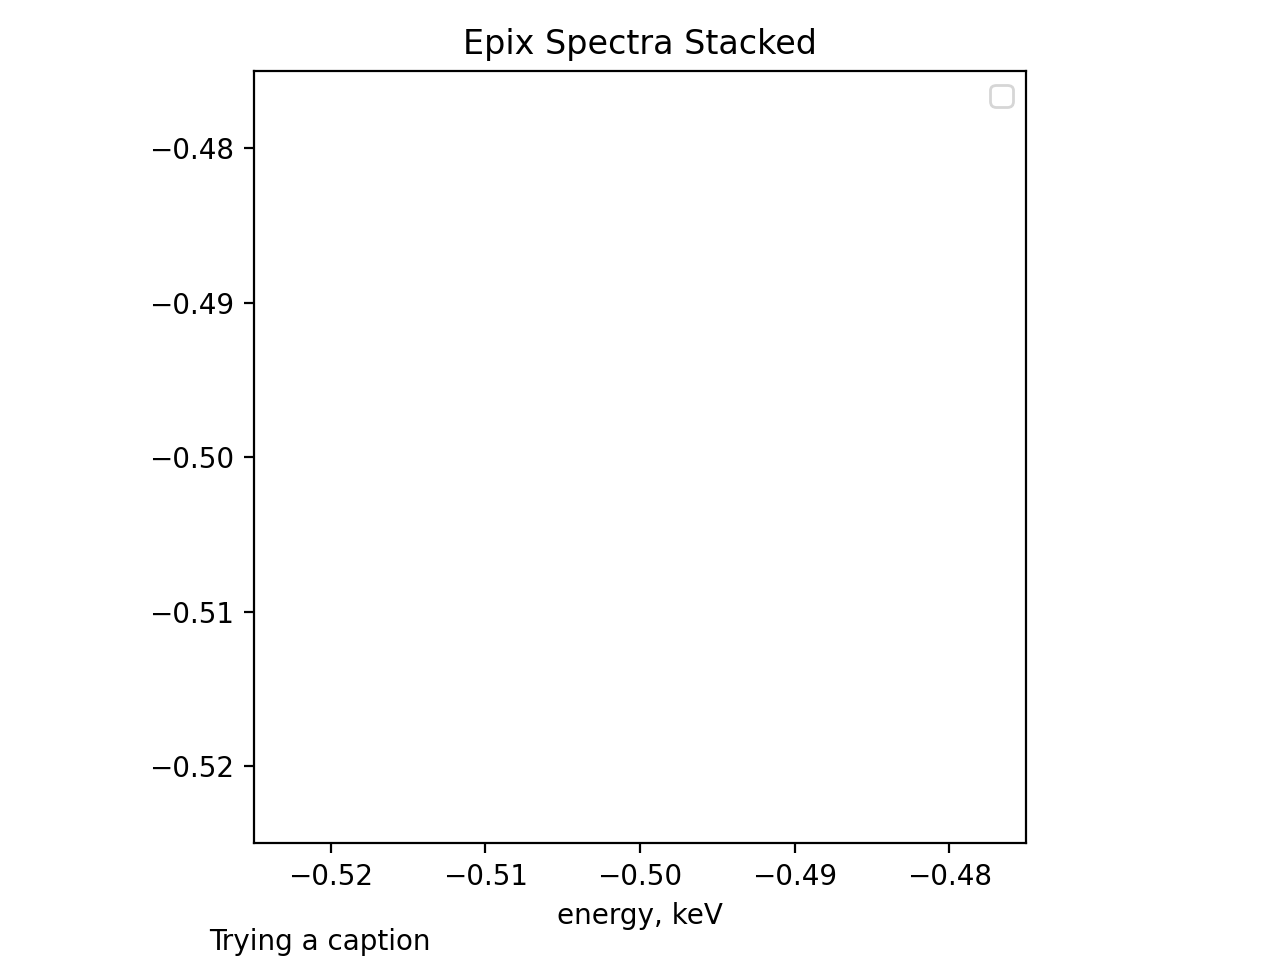

In [47]:
plt.figure()
plt.imshow(raw_data.avg_epix_2d[95:145,205:305])
plt.legend(('scans_to_plot_comp'))
plt.title('Epix Spectra Stacked')
plt.xlabel('energy, keV')
txt="Trying a caption"
plt.figtext(0.25, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
# Applies an energy window to both spectra. Decide on window based on epix spectrum above.
# Also, reduces the resolution of the xrt spectrometer to match that of the epix.
energy_window = [7.051,7.07785]
for i in range(0,len(raw_datas)):
#     if hasattr(raw_datas[i],'epix_energy_windowed'): #this if statement must be commented out for the windowing to happen
#         continue
    reduce_xrt_res.apply_window(raw_datas[i],energy_window)
    reduce_xrt_res.reduce_res(raw_datas[i])


# plt.figure()
# plt.plot(raw_data.epix_energy_windowed,np.sum(raw_data.xrt_red_res,0))
# plt.plot(raw_data.xrt_energy_windowed,np.sum(raw_data.xrt_windowed,0),alpha=0.5)
# plt.show()

Filter info for run_166:


<IPython.core.display.Javascript object>


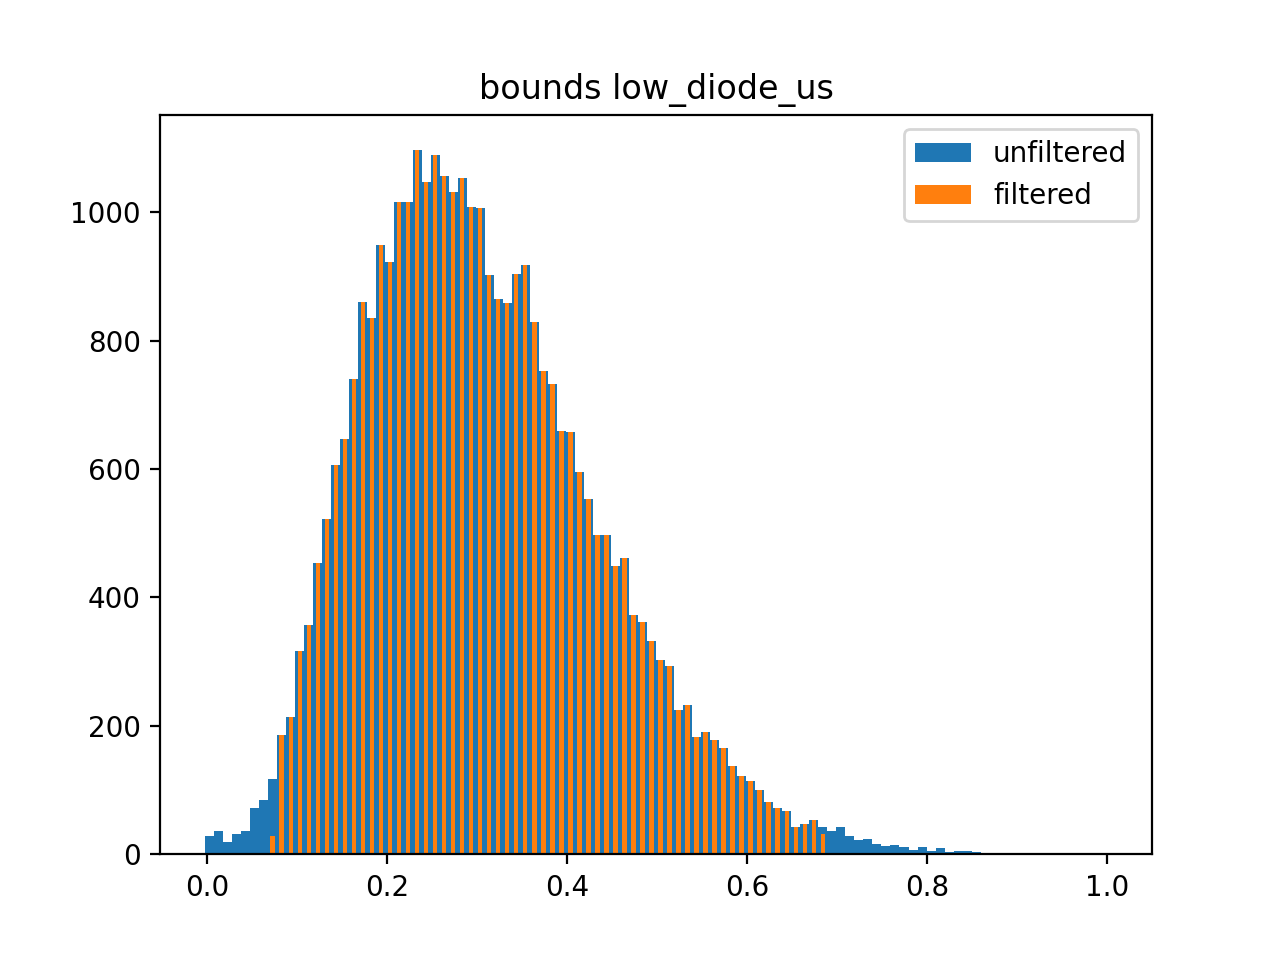

Filter0 removed 682 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


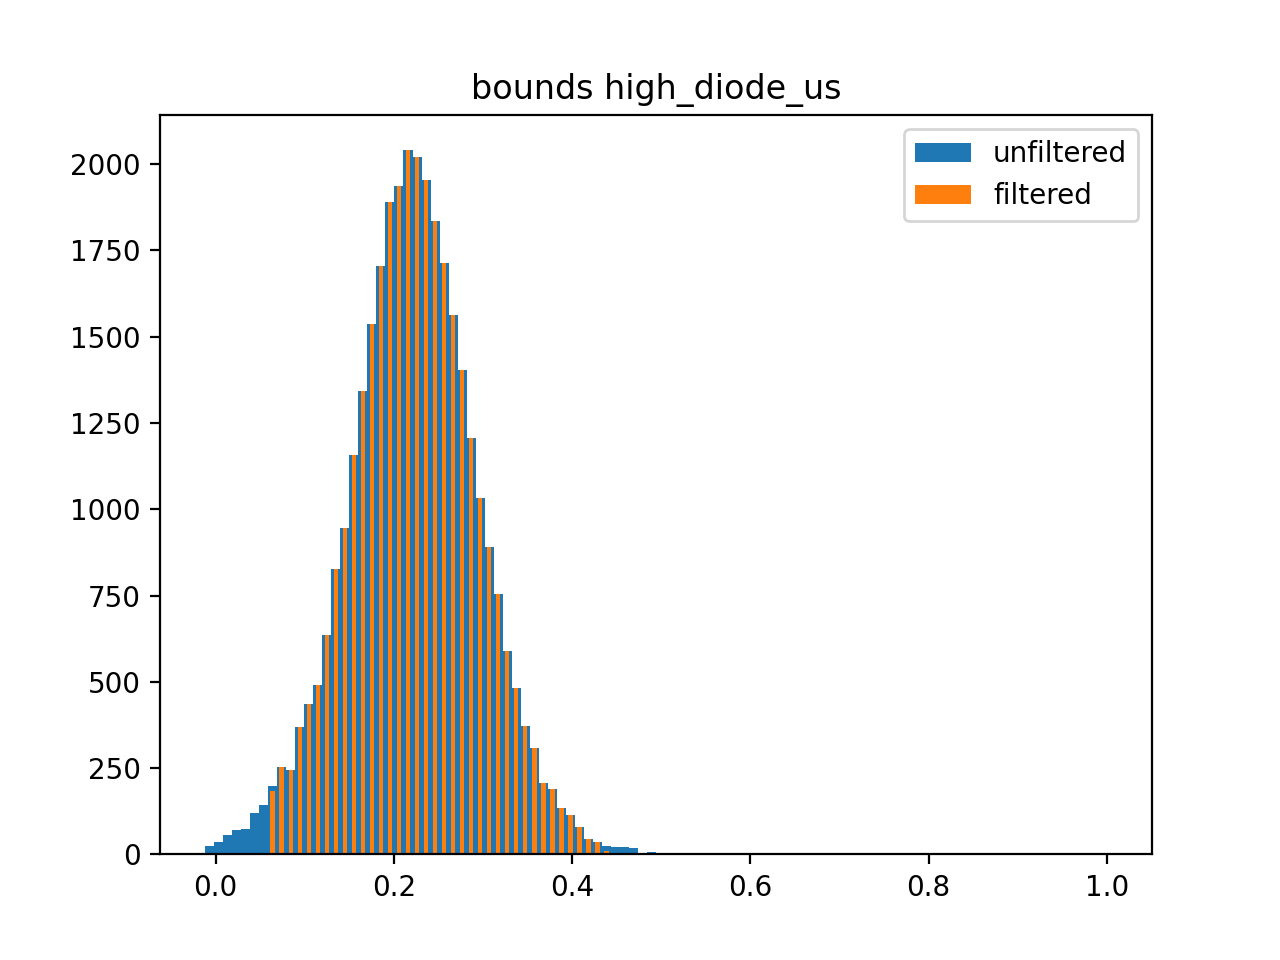

Filter1 removed 396 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


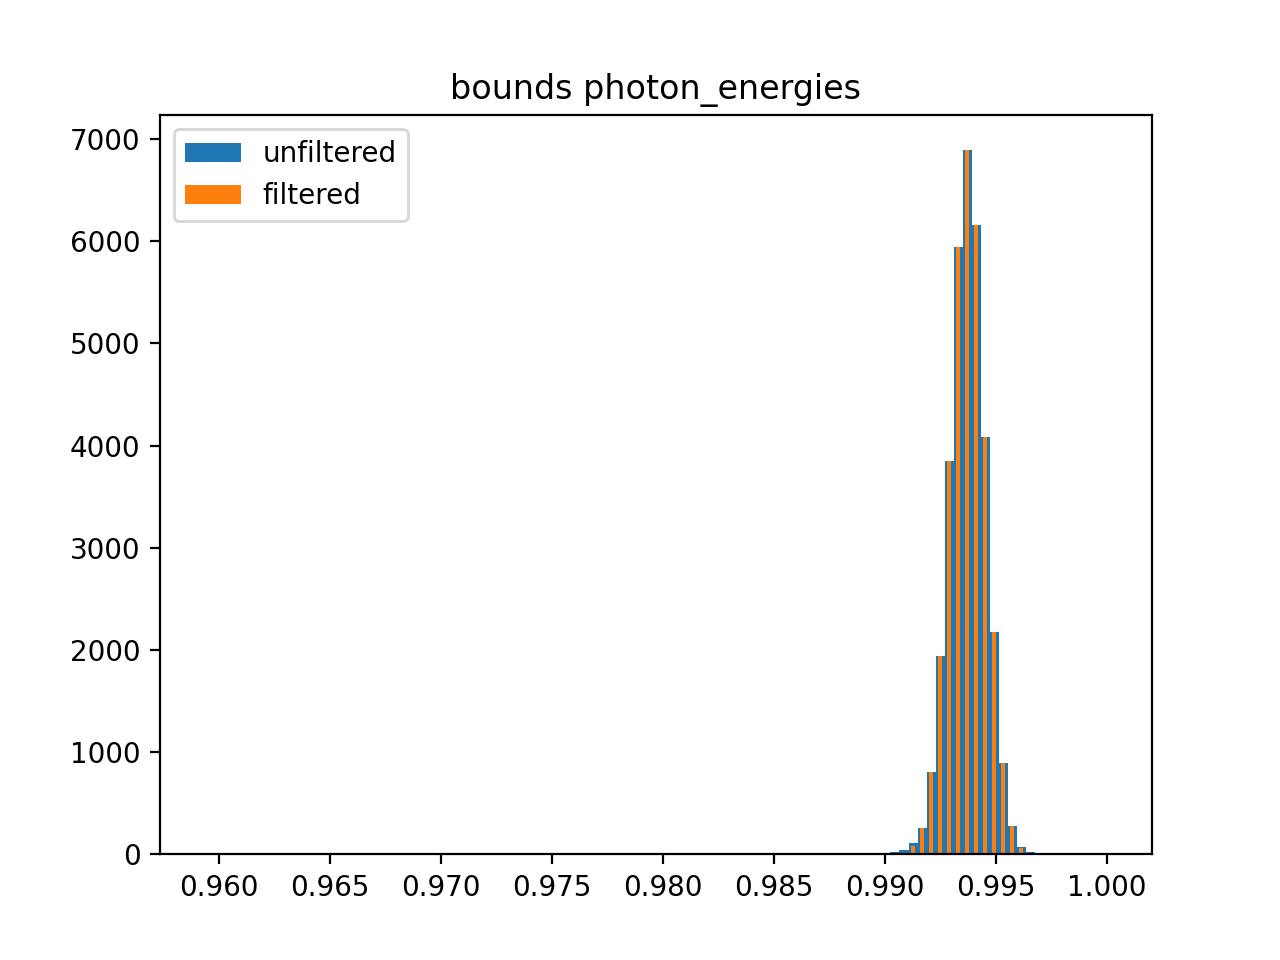

Filter2 removed 80 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


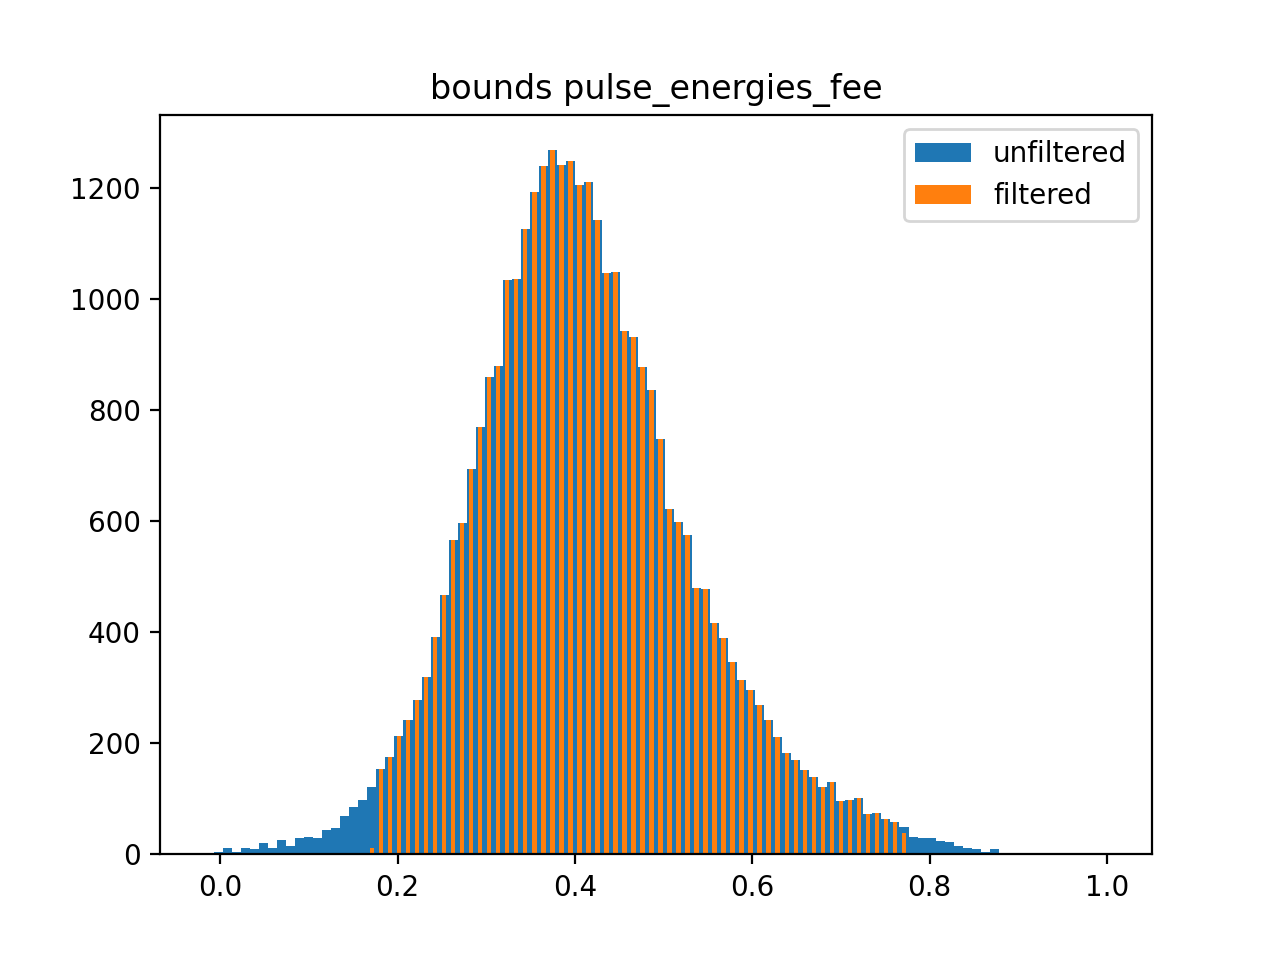

Filter3 removed 410 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


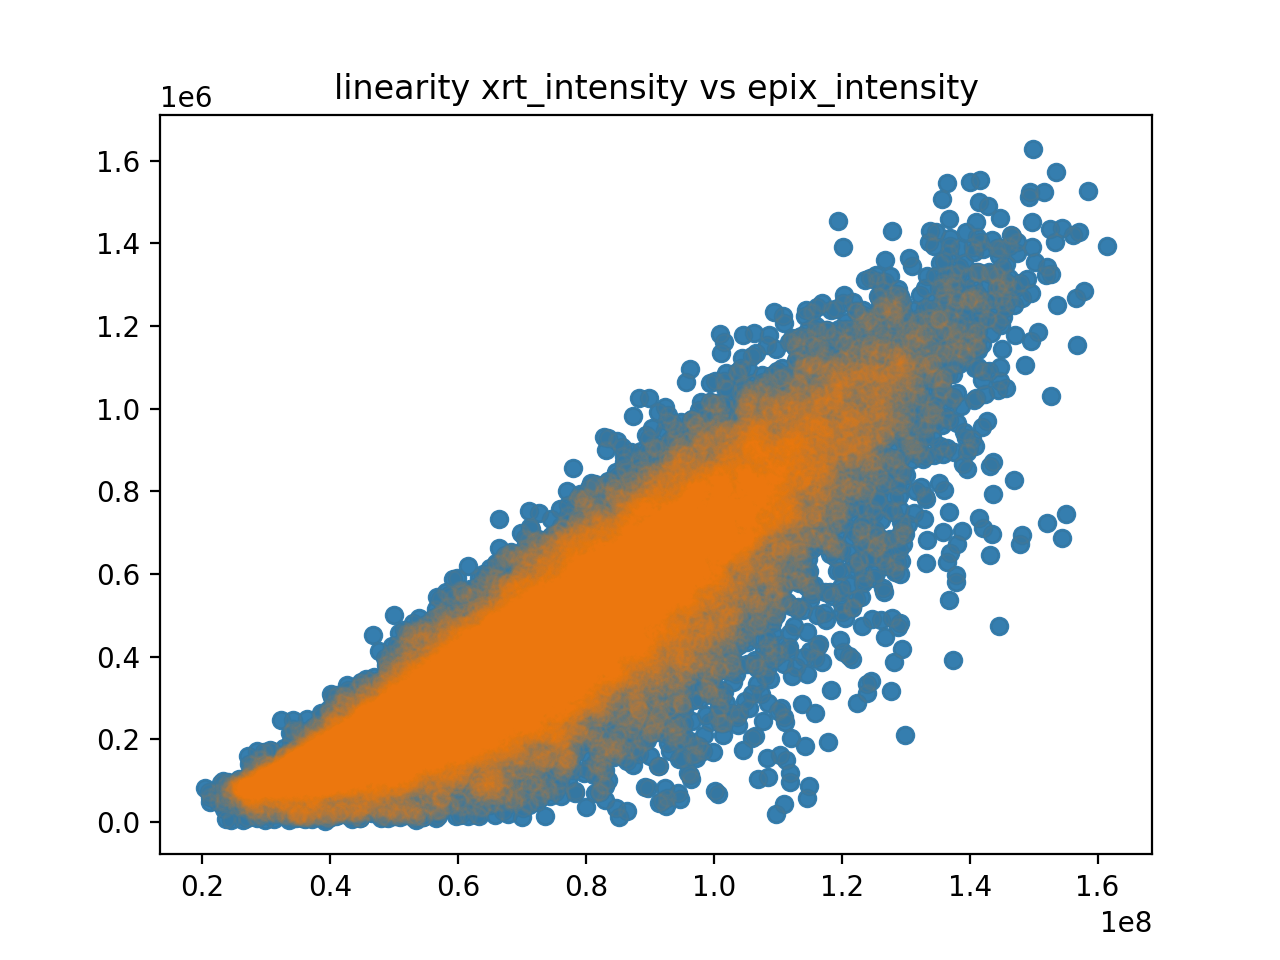

Filter4 removed 0 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


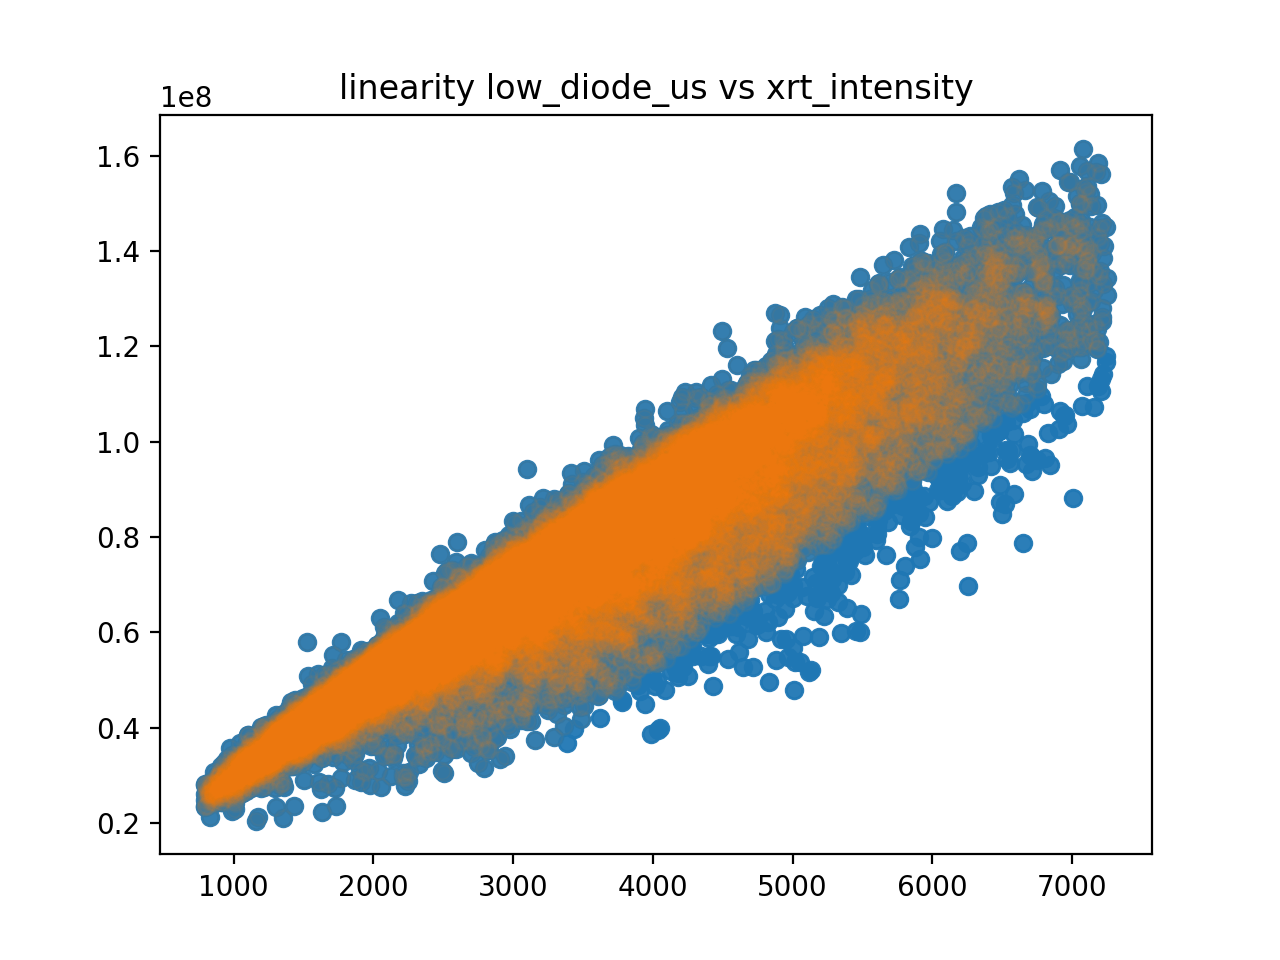

Filter5 removed 287 unique shots out of 33583 total shots.


<IPython.core.display.Javascript object>


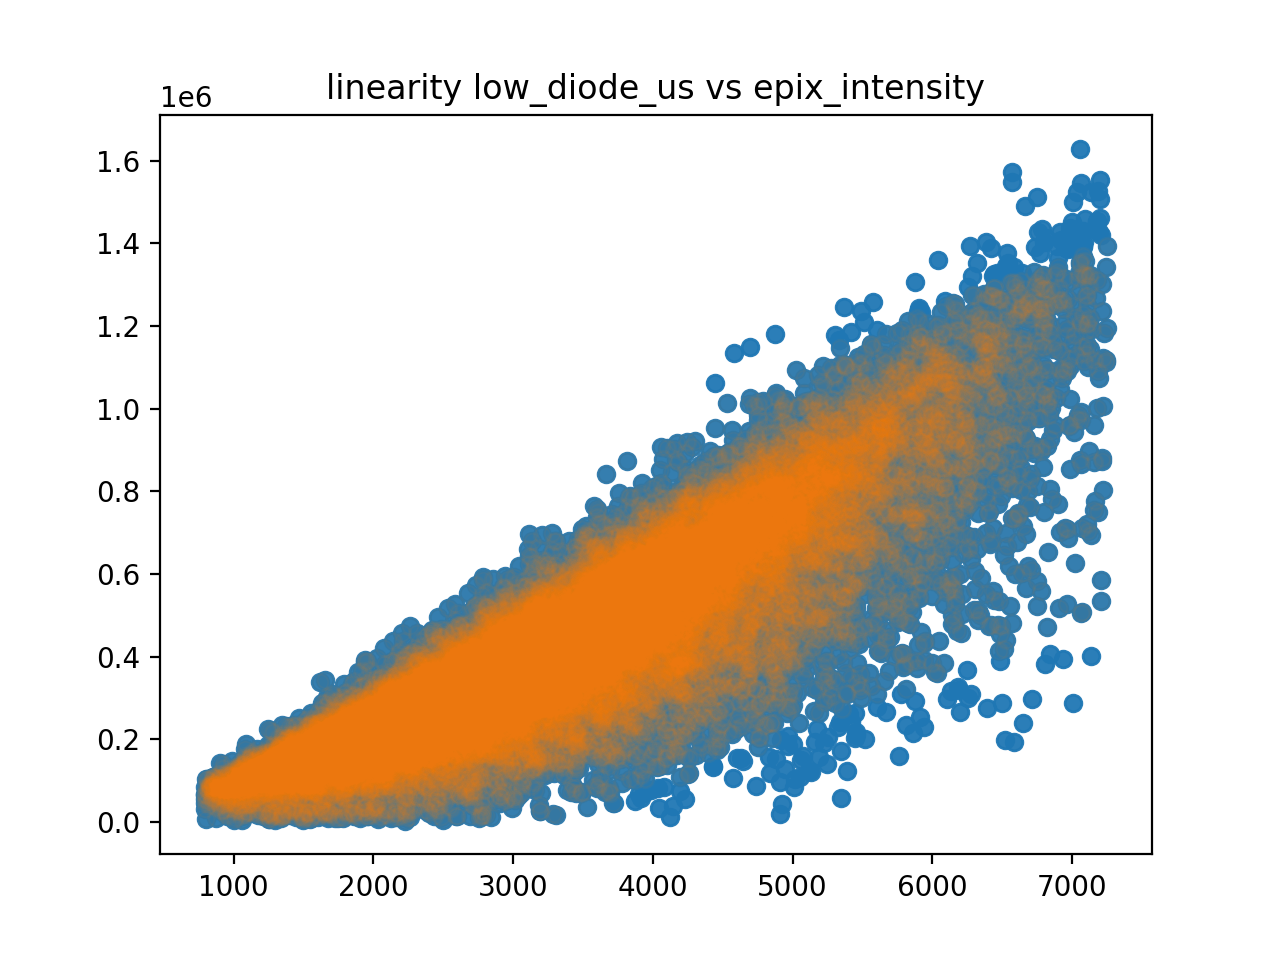

Filter6 removed 113 unique shots out of 33583 total shots.
The combined filters removed 1968 shots out of 33583 total shots | 5.86 %

Bounds filters removed 1568 shots out of 33583 total shots.
Linearity filters removed 400 shots out of 33583 total shots.
The combined filters removed 1968 shots out of 33583 total shots | 5.86 %

Filter info for run_167:

Bounds filters removed 1292 shots out of 33753 total shots.
Linearity filters removed 351 shots out of 33753 total shots.
The combined filters removed 1643 shots out of 33753 total shots | 4.868 %



In [7]:
# Inputs for filters
# filters = [filter0,filter1, ...,filterN]

            # filterX[0] = On/Off # True or False
            # filterX[1] = Type # 'bounds','linearity','rms'
            # filterX[2] = [par0,par1,...,parN]
            
                # If Type = 'bounds'    # par0 = 'key_0' # key_X is string from raw_data.getKeys()
                                        # par1 = lower bound # check raw_data.keyX for starting point 
                                        # par2 = upper bound # 'None' if no upper bound
                                        # par3 = number of stds from median allowed
            
                # If Type = 'linearity' # par0 = 'key_0','key_1' # key_0 and key_1 and x and y values, respectively
                                        # par1 = width of filter
                                        # par2 = force fit through origin? # True or False
                    
# filterX[3] = [in_1, in_2]
                # in_1 = On/Off # True or false
                # in_2 = plot_one # The run you want to see plots for. Declared above in the 2nd block.

# print(raw_data.getKeys()) 
plot_one = 166
# plot_one = 68
# plot_one = 76



suspress_output = False
filt0 = [True,'bounds',['low_diode_us',0.075,'None',3],[True,plot_one]]
filt1 = [True,'bounds',['high_diode_us',0.06,'None',3],[True,plot_one]]
filt2 = [True,'bounds',['photon_energies',0.945,'None',3],[True,plot_one]]
filt3 = [True,'bounds',['pulse_energies_fee',0.175,'None',3],[True,plot_one]]

# The linearity filters create their fit based on data points that make it through
# the bounds filters.

filt4 = [True,'linearity',['xrt_intensity','epix_intensity',0.08,True],[True,plot_one]]
filt5 = [True,'linearity',['high_diode_us','fluo_diode_ds',0.13,False],[True,plot_one]]
filt6 = [True,'linearity',['low_diode_us','xrt_intensity',0.15,True],[True,plot_one]]
filt7 = [True,'linearity',['low_diode_us','epix_intensity',0.2,True],[True,plot_one]]


filters = [filt0,filt1,filt2,filt3,filt4,filt6,filt7]
# filters = [filt0,filt1,filt2,filt3,filt4,filt5,filt6]
# filters = [filt0,filt1,filt2,filt3,filt4,filt6,filt7]


conditions = [Filters.filtering(raw_datas[i],filters,suspress_output) for i in range(0,len(raw_datas))]

In [9]:
# Make or load processed data
make_pro = False
pro_datas = []
probe_run = [166,make_pro]
scaling = True # True = 'avg(x)/avg(y)'| False =  'avg(x/y)' 
                        ## THIS ONE ###

for i in range(0,len(raw_datas)):
    if make_pro:
        if probe_run[1]:
            new_scale = raw_datas[runs.index(probe_run[0])].make_pro_data(conditions[runs.index(probe_run[0])],filters)
            probe_run,spec_scale = new_scale.scale_spectrometers(probe_run,scaling)
        processed_data = raw_datas[i].make_pro_data(conditions[i],filters)
        pro_datas = pro_datas + [processed_data]
    else:
        if os.path.exists(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl"):
            with open(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl", "rb") as f:
                processed_data = pickle.load(f)
                pro_datas = pro_datas + [processed_data]
                print('Loaded processed_data for run ' + processed_data.scan_name)
        else:
            print('You are trying to load a file that does not exist.')
        
    pro_datas[i].scale_spectrometers(probe_run,scaling)

len(pro_datas)

# probe_run = [26,True]
# probe_run = pro_datas[-1].scale_spectrometers(probe_run)

Loaded processed_data for run run_166
[166, False]
Loaded processed_data for run run_167
[166, False]


2

85191
85191
85191


<IPython.core.display.Javascript object>


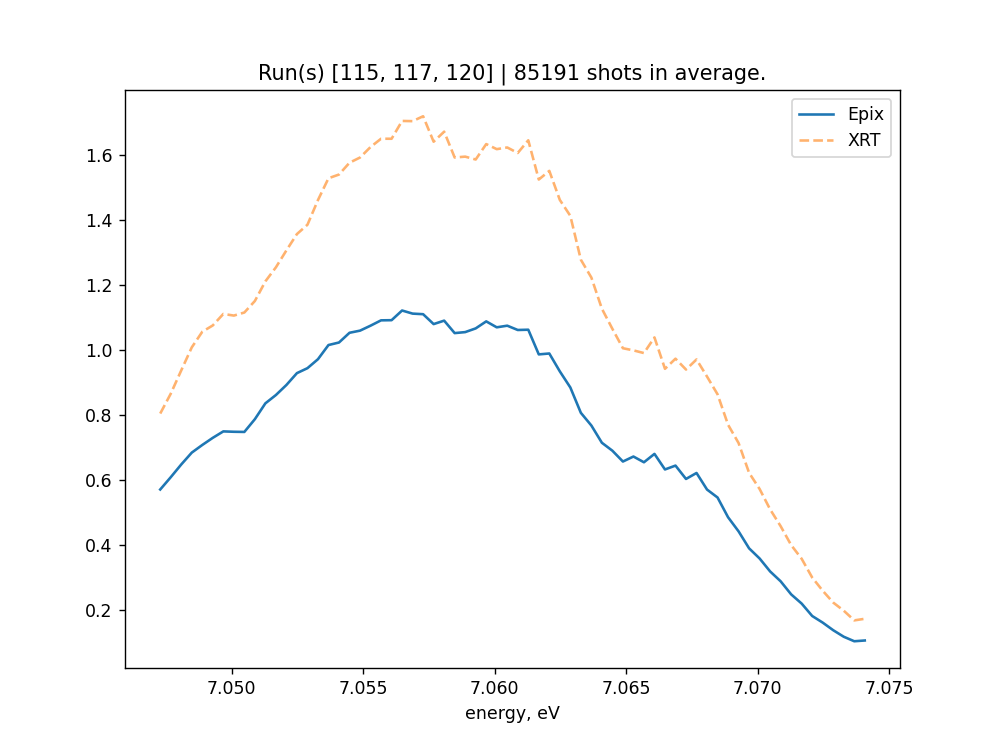

<IPython.core.display.Javascript object>


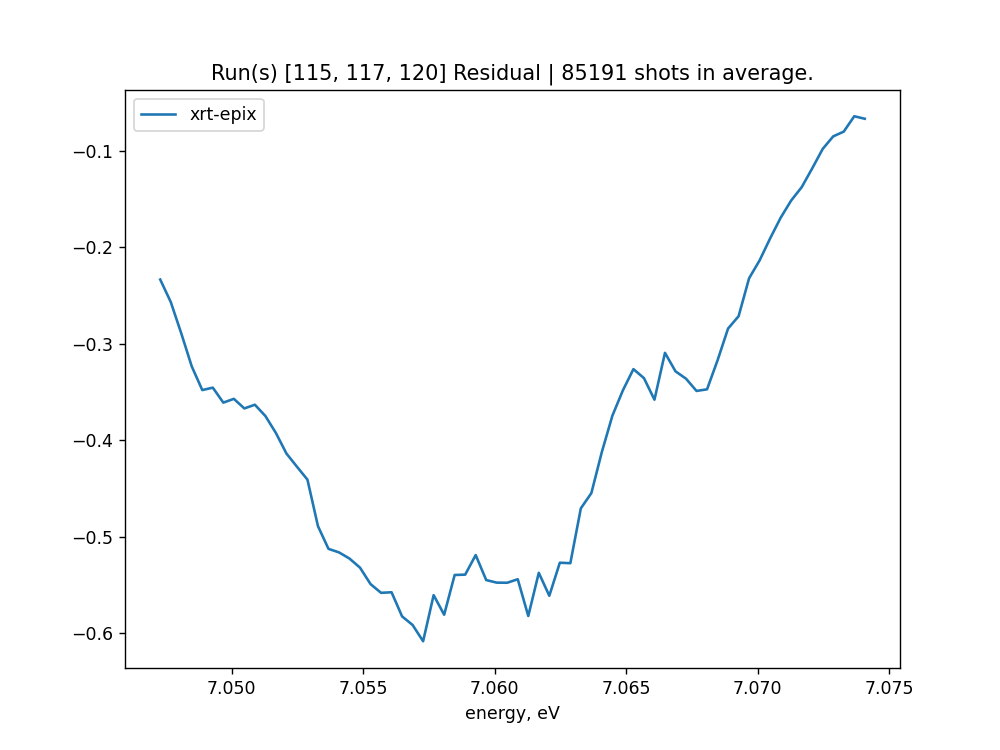

<IPython.core.display.Javascript object>


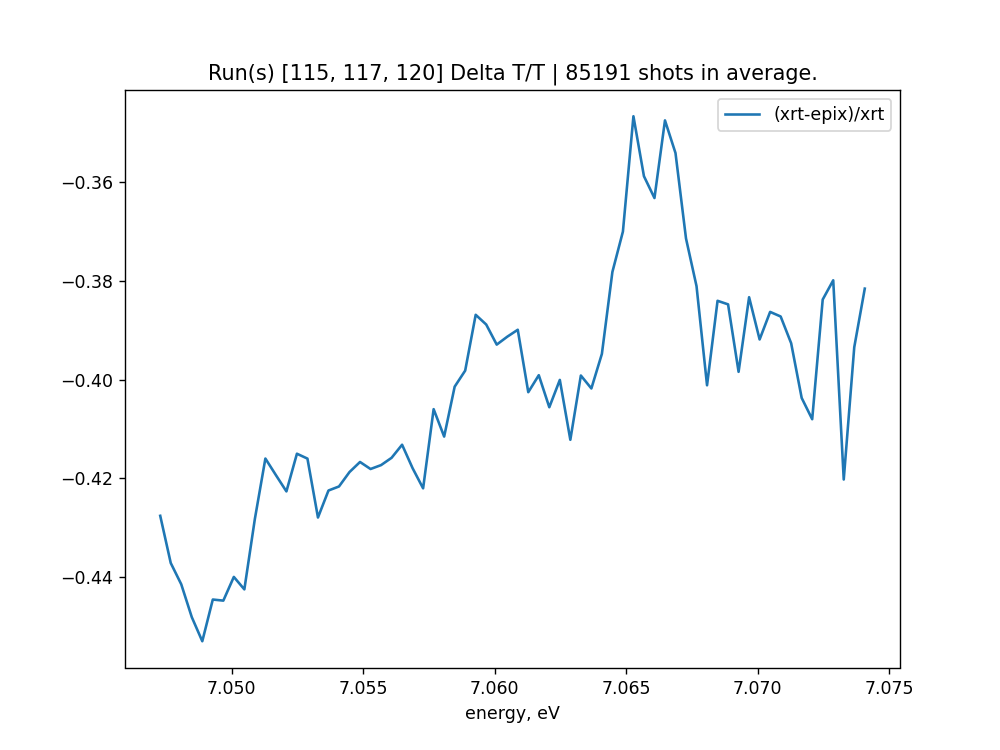

In [8]:
# Enter runs to plot averages
all_shots = True
check_dim = True #print length of all epix and xrt shots and shot id. should be =

plot_stacked = True #plots average of Epix and average of XRT
plot_residual = True
plot_deltaT_T = True
plot_bootstrap = False
shot_by_shot = True
boot = 50 
fraction = 1/4
plot_type = 'DeltaT/T' #enter type of plot for bootlegging: 'stacked','residual', or'DeltaT/T'

scans_to_average = [115,117,120]
input_vars = [scans_to_average,all_shots,runs,boot,fraction,plot_type,plot_stacked,plot_residual,plot_deltaT_T, plot_bootstrap,check_dim,shot_by_shot]
plot_average.plot_average(pro_datas,input_vars)

<IPython.core.display.Javascript object>


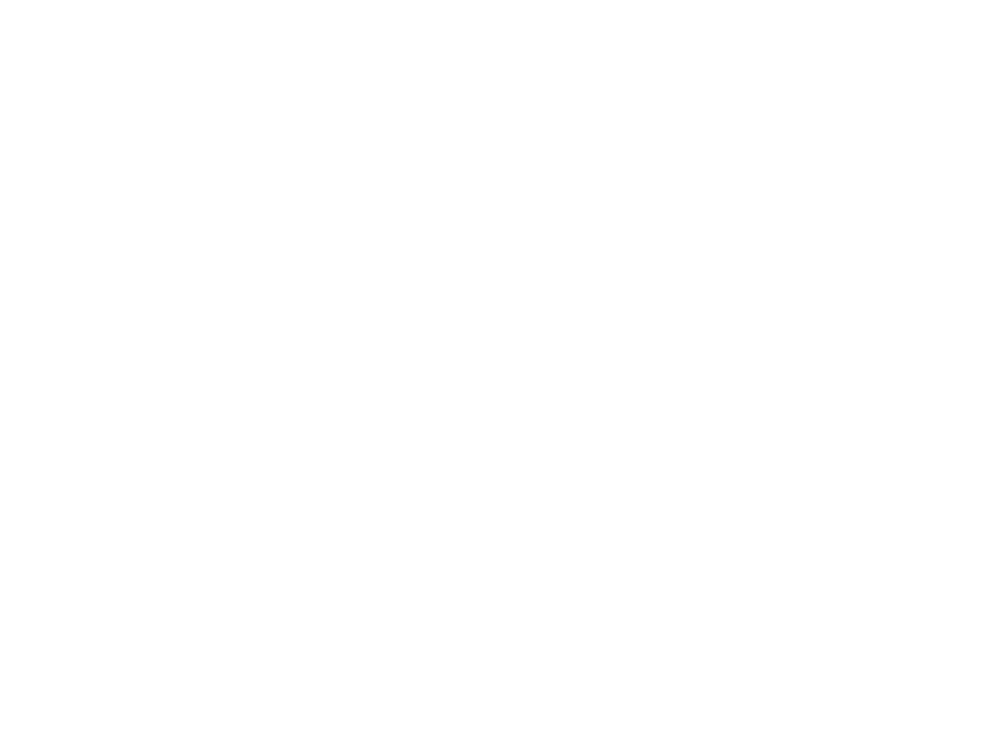

IndexError: list index out of range

In [9]:
#Plot comparison of residuals and deltaT/T for multiple runs

energy = pro_datas[0].epix_energy_windowed
scans_to_plot = [140,142]
idx = np.searchsorted(runs,scans_to_plot)

compare_resid = True
compare_deltaT_T = True

plot_average.plot_comparison(pro_datas,scans_to_plot,runs,energy,compare_resid,compare_deltaT_T)
    
    

In [ ]:
test = [[150],[154],[155]]
idx = [np.searchsorted(runs,test[i]) for i in range(0,len(test))] # runs
labels = '0fs','5fs','10fs','15fs'
for j in range(0,len(idx)):
    plt.figure()
    for i in idx[j]:
        _, bins, _ = plt.hist(pro_datas[i].fluo_diode_ds, 100,rwidth=.75,alpha = 0.7)
        plt.legend()
    plt.xlabel('Intensity of Fluoresence Diode')
    plt.ylabel('# shots')
    plt.show()

In [ ]:
test = [[140],[154],[154]]
idx = [np.searchsorted(runs,test[i]) for i in range(0,len(test))] # runs
labels = '0fs','5fs','10fs','15fs'
for j in range(0,len(idx)):

    for i in idx[j]:
        plt.figure()
        plt.scatter(raw_datas[i].fluo_diode_ds,raw_datas[i].high_diode_us,label='unfiltered')
#         plt.scatter(pro_datas[i].fluo_diode_ds,pro_datas[i].high_diode_us,alpha=0.5,label='filtered')
        plt.legend()
        plt.title(test[j])
    plt.xlabel('Intensity of Fluoresence Diode')
    plt.ylabel('# shots')
    plt.show()

In [ ]:
energy = pro_datas[0].epix_energy_windowed
# set_0 = [115,117,120]           
# set_1 = [116,119,121]
# set_2 = [136,138,140]
# set_3 = [137,139,141]
# set_4 = [124,126,128]
# set_5 = [123,125,127]
# set_6 = [129,131,133]
# set_7 = [130,132,135]
# sets = [set_0,set_1,set_2,set_3,set_4,set_5,set_6,set_7]
sets = [[108],[120]]

scale_runs = [108,109]
scale_shots = plot_average.gather_shots(pro_datas,[scale_runs,0,runs])
scale = np.mean(scale_shots[1],0)/np.mean(scale_shots[0],0)
# input_vars = [scans_to_average,all_shots,runs]
# all_xrt_shots,all_epix_shots,all_xrt_shots_based,shot_id

compare = [plot_average.gather_shots(pro_datas,[sets[i],0,runs]) for i in range(0,len(sets))]
# compare = [water,runs1,runs2,...,runsN]

epix_means = [np.mean(compare[i][1],0) for i in range(0,len(compare))]
xrt_means = [np.mean(compare[i][0],0) for i in range(0,len(compare))]

resid_means_epix =[epix_means[i]-epix_means[0] for i in range(0,len(compare))]
deltaT_T_means_epix= [(resid_means_epix[i]/epix_means[0]) for i in range(0,len(compare))]

resid_means_xrt =[xrt_means[i]-xrt_means[0] for i in range(0,len(compare))]
deltaT_T_means_xrt =[(resid_means_xrt[i]/xrt_means[0]) for i in range(0,len(compare))]

resid_means_both =[epix_means[i]-xrt_means[i] for i in range(0,len(compare))]
deltaT_T_means_both =[(resid_means_both[i]/xrt_means[i]) for i in range(0,len(compare))]


plt.figure()
[plt.plot(energy,deltaT_T_means_epix[i]) for i in range(1,len(deltaT_T_means_epix))]
plt.legend((sets[1:]))
plt.title('(Epix_sample-Epix_water)/Epix_water')
plt.xlabel('energy, keV')

plt.figure()
[plt.plot(energy,deltaT_T_means_xrt[i]) for i in range(1,len(deltaT_T_means_xrt))]
plt.legend((sets[1:]))
plt.title('(xrt_sample-xrt_water)/xrt_water')
plt.xlabel('energy, keV')
plt.show()

plt.figure()
[plt.plot(energy,deltaT_T_means_both[i]) for i in range(1,len(deltaT_T_means_both))]
plt.legend((sets[1:]))
plt.title('(epix-xrt)/xrt')

# plt.legend(('0 fs','10 fs'))
# plt.title('(epix-xrt)/xrt | out of focus')

plt.xlabel('energy, keV')
plt.show()

plt.figure()
[plt.plot(energy,epix_means[i]) for i in range(0,len(epix_means))]
plt.legend((sets))
plt.title('epix')
plt.xlabel('energy, keV')
plt.show()

plt.figure()
[plt.plot(energy,xrt_means[i]) for i in range(0,len(xrt_means))]
plt.legend((sets))
plt.title('xrt')
plt.xlabel('energy, keV')
plt.show()

# plt.figure()
# idx = np.searchsorted(runs,[68,50,75]) # runs

# [plt.scatter(pro_datas[i].fluo_diode_ds,pro_datas[i].high_diode_us) for i in idx]
# plt.xlabel('fluo_diode')
# plt.ylabel('pump_diode')
# plt.legend(('water','sample, normal','sample, foil'))

In [ ]:
energy = pro_datas[0].epix_energy_windowed
sets = [[110,111,112],[115,117,120],[116,119,121]]
# input_vars = [scans_to_average,all_shots,runs]
# all_xrt_shots,all_epix_shots,all_xrt_shots_based,shot_id
compare = [plot_average.gather_shots(pro_datas,[sets[i],0,runs]) for i in range(0,len(sets))]
# compare = [water,r72,r73,r74,sample]

epix_means = [np.mean(compare[i][1],0) for i in range(0,len(compare))]
xrt_means = [np.mean(compare[i][2],0) for i in range(0,len(compare))]
# epix_means = [epix_means[0],epix_means[1],epix_means[2]]
resid_means_epix =[epix_means[i]-epix_means[0] for i in range(0,len(compare))]
deltaT_T_means_epix= [(resid_means_epix[i]/epix_means[0]) for i in range(0,len(compare))]

resid_means_xrt =[xrt_means[i]-xrt_means[0] for i in range(0,len(compare))]
deltaT_T_means_xrt =[(resid_means_xrt[i]/xrt_means[0]) for i in range(0,len(compare))]

resid_means_both =[epix_means[i]-xrt_means[i] for i in range(0,len(compare))]
deltaT_T_means_both =[(resid_means_both[i]/xrt_means[i]) for i in range(0,len(compare))]


In [ ]:
energy = pro_datas[0].epix_energy_windowed

epix_water_mean = np.mean(water[1],0)
epix_sample_mean = np.mean(sample[1],0)

xrt_water_mean = np.mean(water[0],0)
xrt_sample_mean = np.mean(sample[0],0)
scale = np.max(epix_water_mean)/np.max(xrt_water_mean)
#################

epix_resid_means = epix_sample_mean-epix_water_mean
epix_DeltaT_T_means = epix_resid_means/epix_water_mean

xrt_resid_means = xrt_sample_mean-xrt_water_mean
xrt_DeltaT_T_means = xrt_resid_means/xrt_water_mean

#################

both_resid_sample_sbs = sample[1]-sample[0]*scale
both_DeltaT_T_sample_sbs = both_resid_sample/sample[0]*scale

both_resid_water_sbs = water[1]-water[0]*scale
both_DeltaT_T_water_sbs = both_resid_water/water[0]*scale
both_DeltaT_T_sample = np.mean(both_DeltaT_T_sample_sbs,0)
both_DeltaT_T_water = np.mean(both_DeltaT_T_water_sbs,0)
#################

plt.figure()
plt.plot(energy[0:70],epix_DeltaT_T_means)
plt.title('DeltaT_T : (Epix_sample-Epix_water)/Epix_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

plt.figure()
plt.plot(energy[0:70],xrt_DeltaT_T_means)
plt.title('DeltaT_T : (XRT_sample-XRT_water)/xrt_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

plt.figure()
plt.plot(energy[0:70],both_DeltaT_T_sample,label='sample')
plt.plot(energy[0:70],both_DeltaT_T_water,label='water',alpha=0.6,linestyle='dashed')

plt.title('DeltaT_T : (XRT_sample-XRT_water)/xrt_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

In [ ]:
compare[1][4]

In [ ]:
plt.figure()
plt.

In [ ]:
plot_type = 'DeltaT/T'
boot = 100
fraction = 1/5
if type(boot)==int:
    plt.figure()
    for j in range(1,len(compare)):
        for i in range(0,boot):
            if j is 1:
                color = 'k'
            if j is 2:
                color = 'b'
            if j is 3:
                color = 'g'
            if j is 4:
                color = 'c'
            rand_=np.random.choice(len(compare[j][1]), np.int64(len(compare[2][1])*fraction), replace=False)
            rand_shots_epix = np.mean(compare[j][1][rand_],0)
            rand_shots_xrt = np.mean(scale*compare[j][0][rand_],0)
            rand_shots_residual = rand_shots_epix-rand_shots_xrt
            rand_shots_DeltaT_T = rand_shots_residual/rand_shots_xrt
            if plot_type == 'stacked':
                plt.plot(energy,rand_shots_epix)
                plt.plot(energy,rand_shots_xrt,linestyle='dashed',alpha=0.6)
            if plot_type == 'residual':
                plt.plot(energy,rand_shots_residual)
            if plot_type == 'DeltaT/T':
                plt.plot(energy,rand_shots_DeltaT_T,color)
plt.legend((sets[1:]))
plt.title('(epix-xrt)/xrt| 100 loop bootstrap')
plt.xlabel('energy, keV')

In [ ]:
plt.figure()
plt.plot(energy,(0.66*epix_means[1]-xrt_means[1])/xrt_means[1])
plt.plot(energy,0.1375+(epix_means[2]-xrt_means[2])/xrt_means[2])
plt.title('(epix-xrt)/xrt')
plt.legend('[154,155]','156')
plt.xlabel('energy, keV')
plt.ylabel('Delta T / T')


var1=epix_means[1]
var2=epix_means[2]/0.66

plt.figure()
plt.plot(energy,var1)
plt.plot(energy,var2)

In [ ]:
numerator = np.mean(pro_datas[0].xrt_norm,0)*(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_based_norm,0))
denomenator = (np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))*np.mean(pro_datas[0].xrt_based_norm,0)
alpha = numerator/denomenator
plt.figure()
plt.plot(energy,alpha*(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))/np.mean(pro_datas[0].xrt_norm,0))
plt.plot(energy,(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_based_norm,0))/np.mean(pro_datas[0].xrt_based_norm,0))

In [12]:
r1 = (np.mean(pro_datas[1].epix_norm,0)-np.mean(pro_datas[1].xrt_norm,0))/np.mean(pro_datas[1].xrt_norm,0)
r2 = (0.66*np.mean(pro_datas[5].epix_norm,0)-np.mean(pro_datas[5].xrt_norm,0))/np.mean(pro_datas[5].xrt_norm,0)
r3 = (np.mean(pro_datas[6].epix_norm,0)-np.mean(pro_datas[6].xrt_norm,0))/np.mean(pro_datas[6].xrt_norm,0)
rn = (np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))/np.mean(pro_datas[0].xrt_norm,0)
num1 = (np.mean(pro_datas[1].epix_norm,0)-np.mean(pro_datas[1].xrt_based_norm,0))/np.mean(pro_datas[1].xrt_based_norm,0)
num2 = (0.66*np.mean(pro_datas[5].epix_norm,0)-np.mean(pro_datas[5].xrt_based_norm,0))/np.mean(pro_datas[5].xrt_based_norm,0)
num3 = (np.mean(pro_datas[6].epix_norm,0)-np.mean(pro_datas[6].xrt_based_norm,0))/np.mean(pro_datas[6].xrt_based_norm,0)
den = (np.mean(pro_datas[0].epix_norm,0)-np.mean(pro_datas[0].xrt_based_norm,0))/np.mean(pro_datas[0].xrt_based_norm,0)
plt.figure()
plt.plot(energy,0.117+num3)
plt.plot(energy,num2)

plt.figure()
plt.plot(energy,0.00375+r3)
plt.plot(energy,r2)

IndexError: list index out of range

<IPython.core.display.Javascript object>


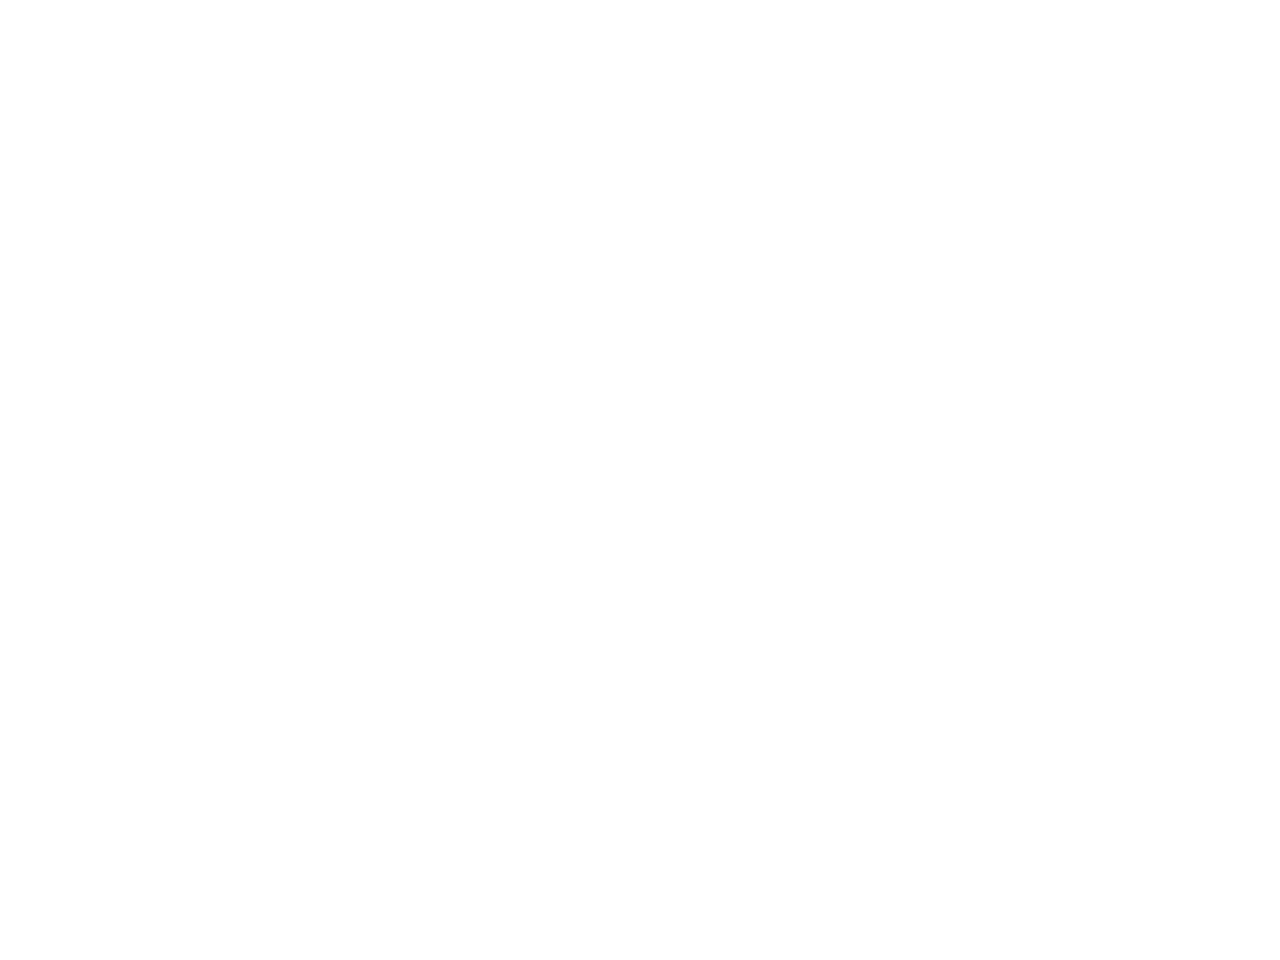

TypeError: unsupported operand type(s) for /: 'processed_data_class' and 'int'

In [11]:
plt.figure()
plt.plot(np.mean(pro_datas[1]))
txt="I need the caption to be present a little below X-axis"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
